# Case Study

### This case is about <b>"Thera bank"</b> which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

Our target attribute in this case is Y = did the customers accept the personal loan offered by the bank / the likelihood of the customers transforming from depositores to personal loan customers.

In [160]:
# To make things easier I will import the library when we need it instead of importing them all at the beginning.

import pandas as pd
import numpy as np

In [161]:

loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

print(loan.shape) ### Checking for our dimensions
loan.head() ### Checking a part of the data

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Our data has 14 Variables and 5000 observations

						
ID : Customer ID

Age	: Customer's age in completed years


Experience :	#years of professional experience	


Income	: Annual income of the customer ($000)


ZIPCode :	Home Address ZIP code.	


Family :	Family size of the customer	


CCAvg :	Avg. spending on credit cards per month ($000)	


Education :	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional	


Mortgage :	Value of house mortgage if any. ($000)		


Personal Loan :	Did this customer accept the personal loan offered in the last campaign?	


Securities Account :	Does the customer have a securities account with the bank?	


CD Account	: Does the customer have a certificate of deposit (CD) account with the bank?	


Online	: Does the customer use internet banking facilities?		


CreditCard :	Does the customer use a credit card issued by UniversalBank?							


# Data visualization and description

To check the data behaviour overall we did a couple of graphs and see what we are dealing with

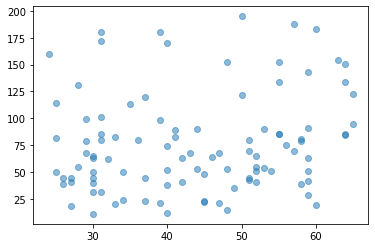

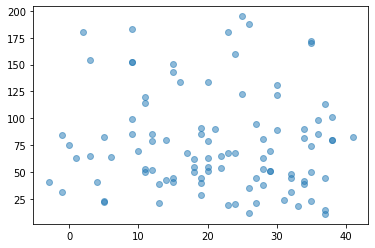

In [162]:
###Lets take 2 variables that seem to be related to each other and check their relationship 
##We will use scatter plot

import matplotlib.pyplot as plt

np.random.seed(19680801)
s_income = loan.Income.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=None)
s_age = loan.Age.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=None)

plt.scatter(s_age, s_income , alpha=0.5)
plt.show()

## Lets check with income and experience

s_exp = loan.Experience.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=None)

plt.scatter(s_exp, s_income , alpha=0.5)
plt.show()

## Oddly enough the Income in this data set has no correlation what so ever with age and experience


In [163]:
## correlation matrix

loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


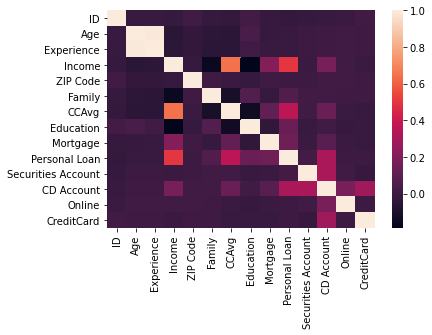

In [164]:
## Graphing the matrix will make it easier for us


import matplotlib.pyplot as plt
import seaborn as sn

corrMatrix = loan.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()


## We can see that experience is highly correlated with age (it makes sense)

## We can see that education and income have almost 0 corelation

## Some honorable mentions : CCAvg and income have a good correlation  / Family and income have a strong correlation as well

In [165]:
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Preprocessing : Data cleaning

Removing or editing null values or values that doesn't make any sense

In [166]:
## First of all we notice that the "ID" is behaving the same as our index. We better remove the ID variable

loan = loan.drop(['ID'],axis=1)
loan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [167]:
# checking if we have missing values

loan.describe()

# We have 5000 observations in all the variables (No missing data found)


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [168]:
# checking for missing data 2nd method

loan.info()

# from the same command we can see that our type of variables are logic and won't need to be converted.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [169]:
# checking for missing data 3rd method

loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [170]:
# ZIP codes might contain letters to fix this we do : 

##loan['ZIP Code'] = loan['ZIP Code'].astype('string')

##However in the US, all zip codes are in numbers only. So we decided to let it as an integer

#### Noisy data check

In [171]:

mask = loan.Age < 18 
loan.Age[mask]

## all of of our customers are 18+ years old (legal age of getting a loan, therefore no noisy data in our Age variable)


Series([], Name: Age, dtype: int64)

In [172]:
## for Experience, a person can begin working from the age of 16 in USA and retire at age of 67 (max year of retiring) , so the maximum work experience must be 51

mask2 = loan.Experience > 51

loan.Experience[mask2]

## No unlogical values found

Series([], Name: Experience, dtype: int64)

In [173]:
## chcking for income  = 0 (not logic)

mask3 = loan.Income == 0
loan.Income[mask3]


Series([], Name: Income, dtype: int64)

In [174]:
##Checking the average spending
## The customer cannot spend more than his monthly income so we will omit any CCAvg that is higher than the income

monthincome = loan.Income / 12
mask4 = monthincome < loan.CCAvg

loan.CCAvg[mask4].count()

## We have found 15 values so we neeed to remove them

loan = loan[mask4 == False] 

loan.shape  ##removed


(4985, 13)

In [175]:
##Checking the education level (must be either 1 2 or 3)

mask5 = (loan.Education != 1) & (loan.Education != 2) & (loan.Education != 3)

loan.Education[mask5]

##No abnormalities

Series([], Name: Education, dtype: int64)

In [176]:
##Personal loan variable (can either be 0 or 1)

mask6 = (loan['Personal Loan'] != 1) & (loan['Personal Loan'] != 0)

loan.Education[mask6]

#No abnormalities


Series([], Name: Education, dtype: int64)

In [177]:
##Securities account variable (can either be 0 or 1)

mask7 = (loan['Securities Account'] != 1) & (loan['Securities Account'] != 0)

loan.Education[mask7]

#No abnormalities


Series([], Name: Education, dtype: int64)

In [178]:
##CD Account (can either be 0 or 1)

mask8 = (loan['CD Account'] != 1) & (loan['CD Account'] != 0)

loan.Education[mask8]

#No abnormalities


Series([], Name: Education, dtype: int64)

In [179]:
##Online (can either be 0 or 1)

mask9 = (loan['Online'] != 1) & (loan['Online'] != 0)

loan.Education[mask9]

#No abnormalities


Series([], Name: Education, dtype: int64)

In [180]:
##Credit card (can either be 0 or 1)

mask10 = (loan['CreditCard'] != 1) & (loan['CreditCard'] != 0)

loan.Education[mask10]

#No abnormalities


Series([], Name: Education, dtype: int64)

In [181]:
### end of data cleaning. saving the csv to use it for data binning

loan.to_csv(r'bank_cleaned.csv', index = False)


# Preprocessing : Data binning

We will try to classify some variables into bins, although we will use the unbinned table because logistic regression requires continuous inputs!

We will be binning these variables : Age , Experience, Income

In [182]:
# We start with the Age variable , we want to aim for those bins :  [0,18] teenagers , [19,29] young adults , [30,60] adults, 60+ eldery



loan_bin = pd.read_csv('bank_cleaned.csv')
bins = [18, 29, 60, 100]
labels = ["young adults", "adults","eldery"]
loan_bin["Age"] = pd.cut(loan_bin['Age'], bins=bins, labels=labels)


In [183]:
loan_bin.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,young adults,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,adults,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,adults,9,100,94112,1,2.7,2,0,0,0,0,0,0
3,adults,8,45,91330,4,1.0,2,0,0,0,0,0,1
4,adults,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [184]:
#Now we move to experience


bins = [0, 5, 10, 20, 50]
labels = ["Low experience", "Medium experience","High experience","Very High expericne"]
loan_bin["Experience"] = pd.cut(loan_bin['Experience'], bins=bins, labels=labels)

loan_bin.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,young adults,Low experience,49,91107,4,1.6,1,0,0,1,0,0,0
1,adults,High experience,34,90089,3,1.5,1,0,0,1,0,0,0
2,adults,Medium experience,100,94112,1,2.7,2,0,0,0,0,0,0
3,adults,Medium experience,45,91330,4,1.0,2,0,0,0,0,0,1
4,adults,High experience,29,92121,4,0.4,2,155,0,0,0,1,0


In [185]:
#Now we move to income


bins = [0, 50, 200, 500]
labels = ["Low income", "Medium income","High income"]
loan_bin["Income"] = pd.cut(loan_bin['Income'], bins=bins, labels=labels)

loan_bin.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,young adults,Low experience,Low income,91107,4,1.6,1,0,0,1,0,0,0
1,adults,High experience,Low income,90089,3,1.5,1,0,0,1,0,0,0
2,adults,Medium experience,Medium income,94112,1,2.7,2,0,0,0,0,0,0
3,adults,Medium experience,Low income,91330,4,1.0,2,0,0,0,0,0,1
4,adults,High experience,Low income,92121,4,0.4,2,155,0,0,0,1,0


# Preprocessing : Detecting outliers

We will now process with detecting the outliers and handling them if necessary

We will use 3 methods : detecting with box plots, detecting with the Z score, detecting with the interquantile range

In [186]:
import matplotlib.pyplot as plt

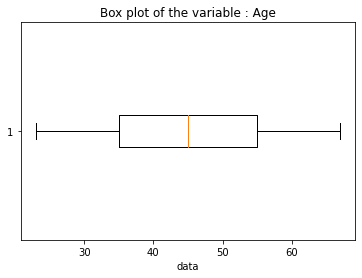

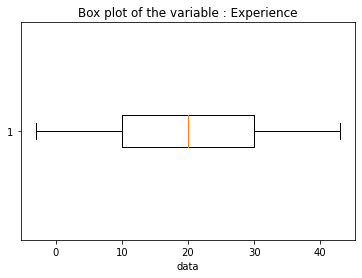

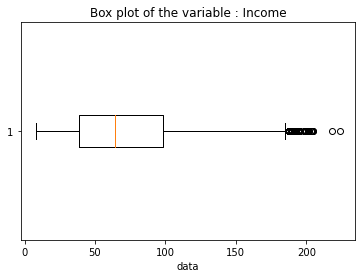

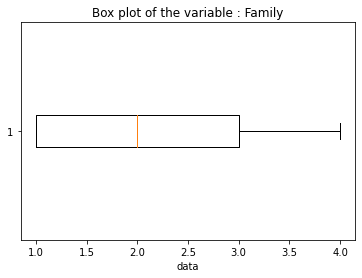

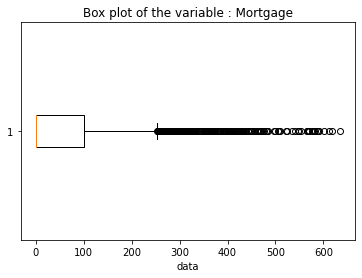

In [187]:
##Personal Loan, Securities, Account CD, Account Online, CreditCard's Box plots all make sense as they are either 0 or 1 (we don't count them)
## ZIP code is irrelevant (We don't count it)
## Education is either 1,2 or 3 so we discard it as well
## Which will leave us with : Age , Experience, Income, Family, CCAvg, Mortgage. we will only plot those variables.
## We will use a counter "i" with a condition that the columns should have 1 of those variables.

ok_var = ['Age', 'Experience', 'Income','Family','CCavg','Mortgage'] ## to test if the variable belongs to this list

for i in range(loan.shape[1]):
    if loan.columns[i] in ok_var:
        plt.boxplot(loan.iloc[:, i], vert=False)
        plt.title("Box plot of the variable : {}".format(loan.columns[i]))
        plt.xlabel('data')
        plt.show()




count    4985.000000
mean       73.968907
std        45.965621
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


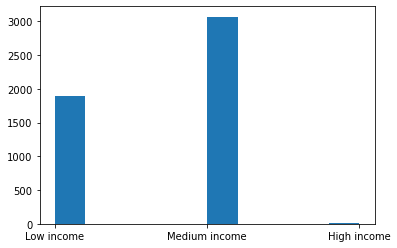

In [188]:
# Income and mortgage seem to have abnormal extreme values, lets begin with income

print(loan.Income.describe())

# We can notice the the average is way lower than the maximum value

plt.hist(loan_bin.Income)
plt.show()

##According to the plot we can see that the income is not balanced, meaning that a vast majority of people lie between the low and the medium income.
##That explains the big concentration in the area

##Also being far from the average can be explained by the very low income of many people that led to the decrease of the average

## Conclusion : We do not delete the outliers (Not only they are logical and explainable, but income in general can go to extreme values and it is normal)

count    4985.000000
mean       56.597192
std       101.827756
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


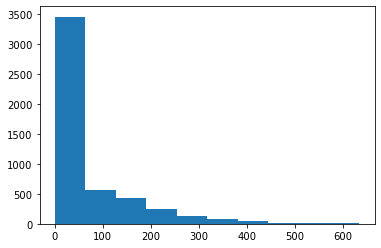

In [189]:
#Now moving to mortgage

print(loan.Mortgage.describe())

# We can notice the the average is way lower than the maximum value

plt.hist(loan_bin.Mortgage)
plt.show()

## The majority of people having a small mortgage, has led the average to decrease greatly, causing the shape of the box plot
## We can consider them as extreme values, but they are not outliers, therefore we must not remove them


# Preprocessing : Normalizing the data

to be able to better visualize some graphs, data normalization is a must !

There are a lot of ways to normalize ( Z score or Min max)

We have chosen to use the Z score normalization 

In [190]:
loan_normal = loan ##keeping the loan as a backup

import statistics ##for calculating Z score

def Zsc (num,mean,stdDv):  ##Function to calculate the Z score
    return round((num-mean)/stdDv,2)

for i in range(loan.shape[1]): ##for i from 1 to 13
         loan_normal.iloc[:, i] = Zsc(loan_normal.iloc[:, i],statistics.mean(loan_normal.iloc[:, i]),statistics.stdev(loan_normal.iloc[:, i])) 
##replacing the column by the normalized version.

loan_normal.head()
    

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.77,-1.67,-0.54,-0.96,1.40,-0.19,-1.05,-0.56,-0.33,2.93,-0.25,-1.22,-0.65
1,-0.03,-0.10,-0.87,-1.44,0.53,-0.25,-1.05,-0.56,-0.33,2.93,-0.25,-1.22,-0.65
3,-0.90,-0.97,0.57,0.45,-1.22,0.43,0.14,-0.56,-0.33,-0.34,-0.25,-1.22,-0.65
4,-0.90,-1.06,-0.63,-0.86,1.40,-0.54,0.14,-0.56,-0.33,-0.34,-0.25,-1.22,1.55
5,-0.73,-0.62,-0.98,-0.49,1.40,-0.88,0.14,0.97,-0.33,-0.34,-0.25,0.82,-0.65


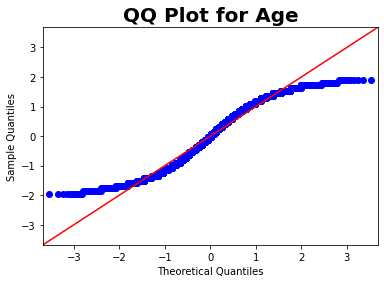

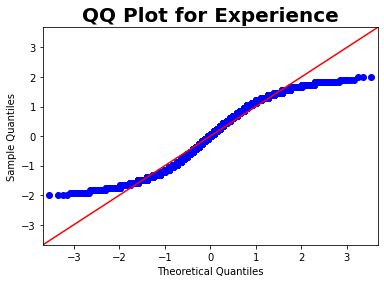

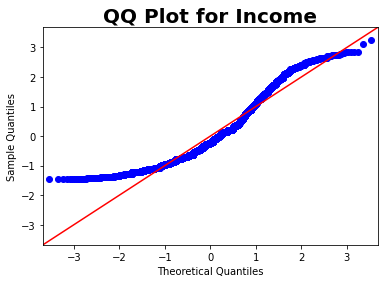

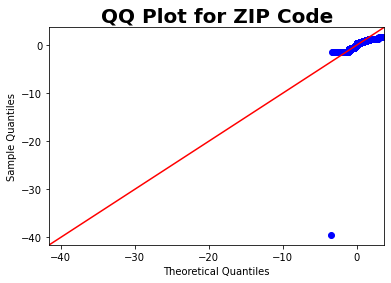

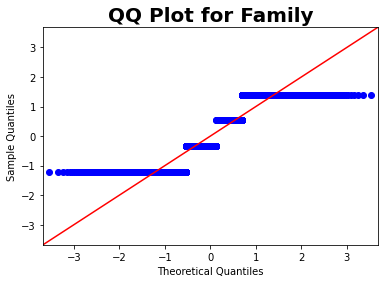

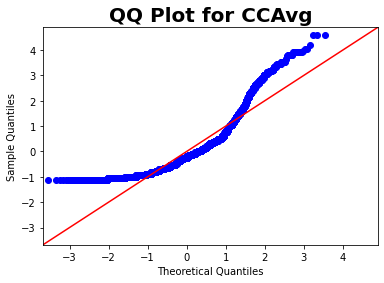

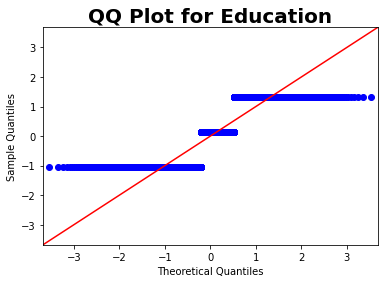

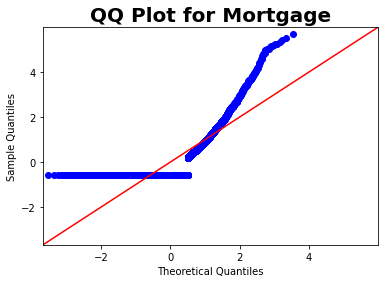

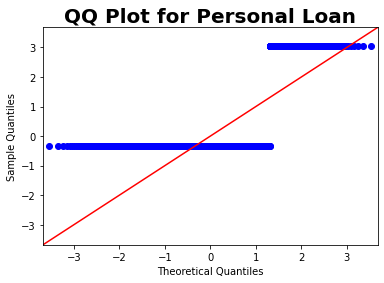

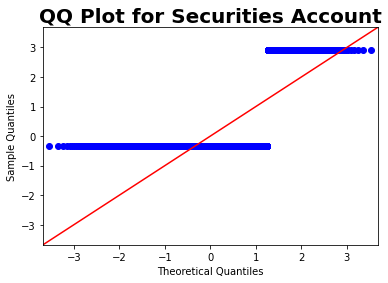

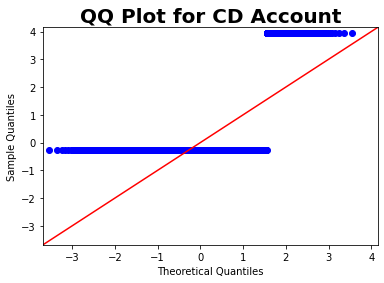

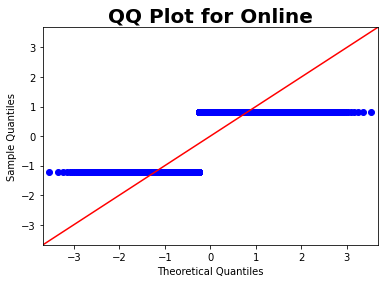

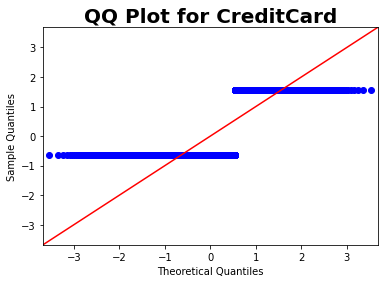

In [191]:
##test for normality (Method 1: QQ plot)

import statsmodels.api as sm
import pylab as py

##Graphing the plots. We will be using a for loop instead of graphing 13 variables.

for i in range(loan.shape[1]):
    sm.qqplot(loan_normal.iloc[:, i], line ='45')
    py.title('QQ Plot for {}'.format(loan.columns[i]),fontsize=20, fontweight = 'bold')


py.show()   


###Interpretation : 

# Age, Experience are close for being normally distributed, but are not normally distributed

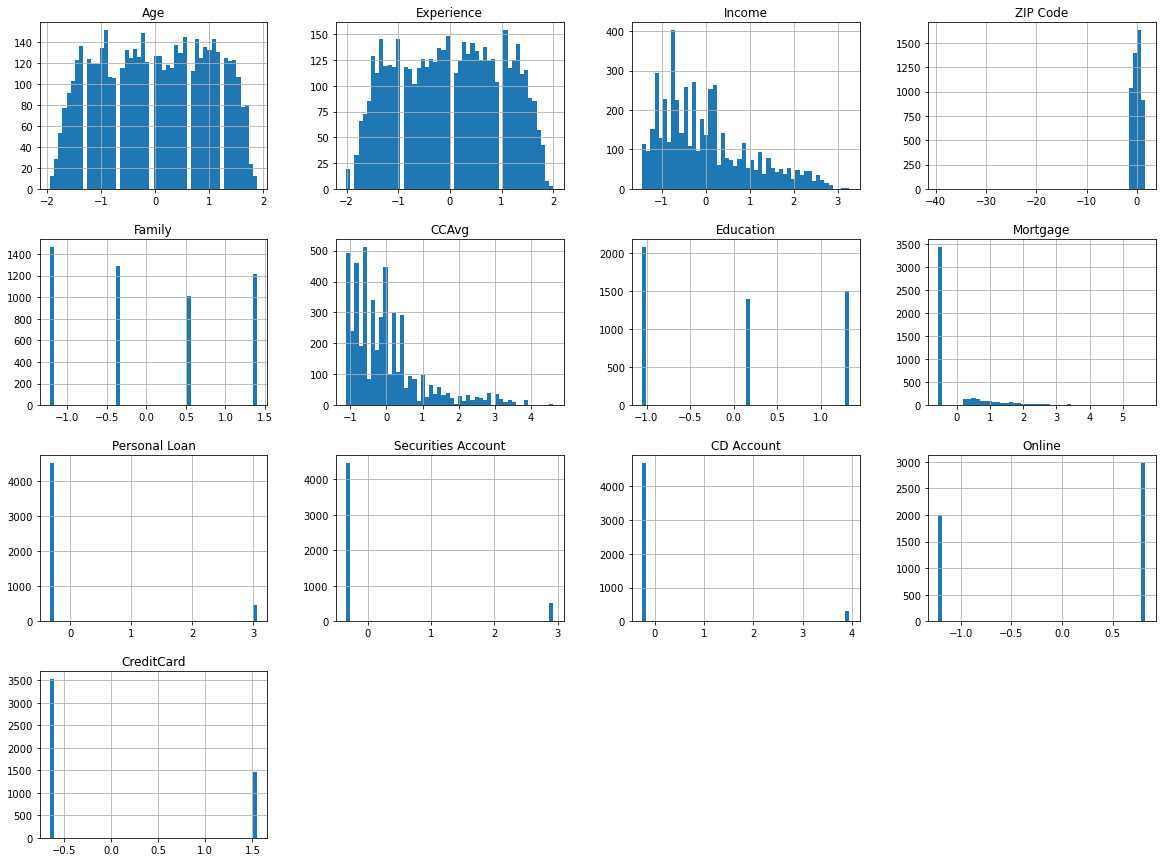

In [192]:
##test for normality (Method 2: Histogram)
import matplotlib.pyplot as plt
import scipy.stats as ss
loan_normal.hist(bins=50, figsize=(20,15))
plt.show()

### This confirms that the age and experience are lienant to achieve normality but are not quite normal. for the rest they are far from being normally distributed.

# Logistic regression

Now we will try to run a logistic model in our data set 
As said before our area of study (y) : did the customers accept the personal loan offered by the bank / the likelihood of the customers transforming from depositores to personal loan customers.This will be our target attribute

As we need our data different from a string (encoded) we will use our cleaned, normalized and <b>Not binned</b> data

In [193]:
loan_normal.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.77,-1.67,-0.54,-0.96,1.40,-0.19,-1.05,-0.56,-0.33,2.93,-0.25,-1.22,-0.65
1,-0.03,-0.10,-0.87,-1.44,0.53,-0.25,-1.05,-0.56,-0.33,2.93,-0.25,-1.22,-0.65
3,-0.90,-0.97,0.57,0.45,-1.22,0.43,0.14,-0.56,-0.33,-0.34,-0.25,-1.22,-0.65
4,-0.90,-1.06,-0.63,-0.86,1.40,-0.54,0.14,-0.56,-0.33,-0.34,-0.25,-1.22,1.55
5,-0.73,-0.62,-0.98,-0.49,1.40,-0.88,0.14,0.97,-0.33,-0.34,-0.25,0.82,-0.65


In [198]:

loan_normal = loan_normal.reset_index(drop=True)  ## Our index were not counted correctly ( 0 --> 1 ---> 3) this fixes the issue

loan_normal.head() #fixed now it is 0 --> 1 --> 2


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.77,-1.67,-0.54,-0.96,1.40,-0.19,-1.05,-0.56,-0.33,2.93,-0.25,-1.22,-0.65
1,-0.03,-0.10,-0.87,-1.44,0.53,-0.25,-1.05,-0.56,-0.33,2.93,-0.25,-1.22,-0.65
2,-0.90,-0.97,0.57,0.45,-1.22,0.43,0.14,-0.56,-0.33,-0.34,-0.25,-1.22,-0.65
3,-0.90,-1.06,-0.63,-0.86,1.40,-0.54,0.14,-0.56,-0.33,-0.34,-0.25,-1.22,1.55
4,-0.73,-0.62,-0.98,-0.49,1.40,-0.88,0.14,0.97,-0.33,-0.34,-0.25,0.82,-0.65


In [200]:
loan_normal.info() ## We don't need to encode it , if we were using loan_dis we would have to do it but we chose not to use the binned data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4985 non-null   float64
 1   Experience          4985 non-null   float64
 2   Income              4985 non-null   float64
 3   ZIP Code            4985 non-null   float64
 4   Family              4985 non-null   float64
 5   CCAvg               4985 non-null   float64
 6   Education           4985 non-null   float64
 7   Mortgage            4985 non-null   float64
 8   Personal Loan       4985 non-null   float64
 9   Securities Account  4985 non-null   float64
 10  CD Account          4985 non-null   float64
 11  Online              4985 non-null   float64
 12  CreditCard          4985 non-null   float64
dtypes: float64(13)
memory usage: 506.4 KB


In [205]:
## Lets set our Xs and Y seperately

X =loan_normal.drop(['Personal Loan'],axis=1)
Y = loan_normal['Personal Loan']

print(X.shape)
print(Y.shape)

(4985, 12)
(4985,)


In [219]:
## Encoding process
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Converting string labels of the target variable to numbers ==> 0 and 1 values
YE =le.fit_transform(Y)
print(YE)

[0 0 0 ... 0 0 0]


In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,YE,test_size=0.25,random_state=31)

### X_Train training set , X_test is the sample and the test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 12)
(1247, 12)
(3738,)
(1247,)


In [230]:
from sklearn.linear_model import LogisticRegression
# making the model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

## DONE ! Now we will visualize it

In [231]:
from sklearn import metrics
confusionm = metrics.confusion_matrix(y_test, y_pred)
confusionm

array([[1105,   13],
       [  51,   78]], dtype=int64)

In [234]:
%matplotlib inline 

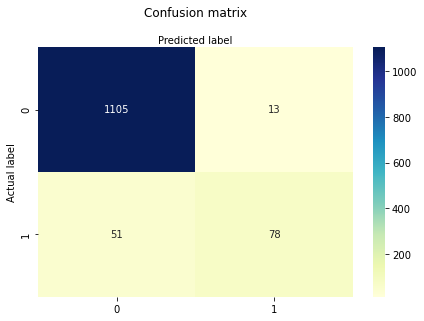

In [235]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))  
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sn.heatmap(pd.DataFrame(confusionm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [236]:
### Validating the accurarcy of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred)) 

### Conclusion : Our model is very accurate

Accuracy: 0.9486768243785084
Precision: 0.8571428571428571
Recall: 0.6046511627906976


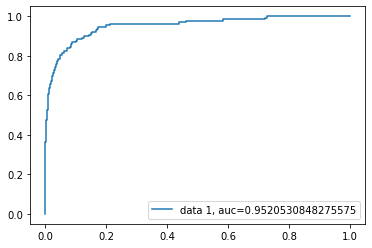

In [237]:
## Visualizing the recall
y_pred_proba = logreg.predict_proba(X_test)[::,1] 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Conclusion : Logistic is almost a perfect classifier !